# Arup University - Machine Learning & Artificial Intelligence
***
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
### 2019 - 2020 Individual assignment
# Road Traffic Accidents


Data sorce:  
 - Road Safety Data: https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data
 - Leeds: https://data.gov.uk/dataset/6efe5505-941f-45bf-b576-4c1e09b579a1/road-traffic-accidents
 - Road network: https://www.ordnancesurvey.co.uk/opendatadownload/products.html
 
 http://rstudio-pubs-static.s3.amazonaws.com/144249_05b562aa12dc4b56ab62a28b35cc2d86.html
 

For graphically pleasing visuals: https://material.io/design/color/#tools-for-picking-colors  
__Color theme__  <br>
<font color=#f44336> - #f44336 ■  </font><br>
<font color=#e91e63> - #e91e63 ■  </font><br>
<font color=#9c27b0> - #9c27b0 ■  </font><br>
<font color=#ffc107> - #ffc107 ■  </font><br>
<font color=#2196F3> - #2196F3 ■  </font><br>
<font color=#03A9F4> - #03A9F4 ■  </font><br>
<font color=#00BCD4> - #00BCD4 ■  </font><br>
<font color=#009688> - #009688 ■  </font><br>



__Primary Colour__  <br>
<font color=#FFEBEE> - #FFEBEE ■  </font>, <font color=#FFCDD2> - #FFCDD2 ■  </font>, <font color=#EF9A9A> - #EF9A9A ■  </font>, <font color=#E57373> - #E57373 ■  </font>, <font color=#EF5350> - #EF5350 ■  </font>, <font color=#f44336> - #f44336 ■  </font>, <font color=#D32F2F> - #D32F2F ■  </font>, <font color=#C62828> - #C62828 ■  </font>, <font color=#B71C1C> - #B71C1C ■  </font>

<font color=#FCE4EC> - #FCE4EC ■  </font>,
<font color=#F8BBD0> - #F8BBD0 ■  </font>, 
<font color=#F48FB1> - #F48FB1 ■  </font>, 
<font color=#F06292> - #F06292 ■  </font>, 
<font color=#EC407A> - #EC407A ■  </font>, 
<font color=#E91E63> - #E91E63 ■  </font>, 
<font color=#D81B60> - #D81B60 ■  </font>, 
<font color=#C2185B> - #C2185B ■  </font>, 
<font color=#AD1457> - #AD1457 ■  </font>
<font color=#880E4F> - #880E4F ■  </font>

__Secondary Colour__  <br>
<font color=#CFD8DC> - #CFD8DC ■  </font>,
<font color=#B0BEC5> - #B0BEC5 ■  </font>, 
<font color=#90A4AE> - #90A4AE ■  </font>, 
<font color=#78909C> - #78909C ■  </font>, 
<font color=#607D8B> - #607D8B ■  </font>, 
<font color=#546E7A> - #546E7A ■  </font>, 
<font color=#455A64> - #455A64 ■  </font>, 
<font color=#37474F> - #37474F ■  </font>, 
<font color=#263238> - #263238 ■  </font>

<br>
__Gabor Jenei__
***

In [1]:
#Imports
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# %matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import dbscan
#from sklearn.cluster import AffinityPropagation

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import seaborn as sns

south_west_penisula_higway = ['E06000028', 'E06000029', 'E10000009','E10000027', 'E06000026', 'E06000027', 'E10000008', 'E06000052']
south_west_penisula_localauth = [496, 580, 581, 582, 583, 584, 585, 586,587,588,589, 596,605,606,607,608,609,610,635,640,641,642,643,644,645,646,647]

In [2]:
data_dir = "H:\\ArupUni\\3_IndividualProject\\data\\accidentData\\"

In [3]:
######### Read up accidents
accidents_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv",low_memory=False)
accidents_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Accidents_2017.zip",low_memory=False, compression='zip')
accidents_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip",low_memory=False, compression='zip')
accidents_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Accidents_2015.zip",low_memory=False, compression='zip')
accidents_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2014.zip",low_memory=False)

######### Read up casualties
casualties_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv",low_memory=False)
casualties_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Casualties_2017.zip",low_memory=False, compression='zip')
casualties_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip",low_memory=False, compression='zip')
casualties_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Casualties_2015.zip",low_memory=False, compression='zip')
casualties_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Casualties_2014.zip",low_memory=False, compression='zip')

######### Read up vehicles
vehicles_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv",low_memory=False)
vehicles_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2017.zip",low_memory=False, compression='zip')
vehicles_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip",low_memory=False, compression='zip')
vehicles_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Vehicles_2015.zip",low_memory=False, compression='zip')
vehicles_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Vehicles_2014.zip",low_memory=False, compression='zip')

df_accidents = accidents_2018.append([accidents_2017, accidents_2016, accidents_2015, accidents_2014])
df_vehicles = vehicles_2018.append([vehicles_2017, vehicles_2016, vehicles_2015, vehicles_2014])
df_casualties = casualties_2018.append([casualties_2017, casualties_2016, casualties_2015, casualties_2014])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [4]:
df_accidents = pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_accidents.csv", low_memory=False)
df_casualties= pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_casualties.csv", low_memory=False)
df_vehicles= pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_vehicles.csv", low_memory=False)

In [4]:
casaualty_severity = df_casualties.groupby(['Accident_Index','Casualty_Severity']).size().unstack(fill_value=0)
casaualty_severity.rename(columns={1: "Fatal", 2: "Serious", 3: "Slight"}, inplace=True)

accidents_s1 = pd.merge(df_accidents, casaualty_severity, on="Accident_Index")
#accidents_s1.rename({1: "Fatal", 2: "Serious", 3: "Slight"}, axis='columns')
accidents_s1.columns

vehicles_type = df_vehicles.groupby(['Accident_Index','Vehicle_Type']).size().unstack(fill_value=0)
vehicles_type.rename(columns={1:"Pedal cycle", 2:"Motorcycle 50cc and under",3:"Motorcycle 125cc and under",
                              4:"Motorcycle over 125cc and up to 500cc",5:"Motorcycle over 500cc",8:"Taxi/Private hire car",
                              9:"Car",10:"Minibus (8 - 16 passenger seats)",11:"Bus or coach (17 or more pass seats)",
                              16:"Ridden horse",17:"Agricultural vehicle",18:"Tram",19:"Van / Goods 3.5 tonnes mgw or under",
                              20:"Goods over 3.5t. and under 7.5t",21:"Goods 7.5 tonnes mgw and over", 22:"Mobility scooter",
                              23:"Electric motorcycle",90:"Other vehicle",97:"Motorcycle - unknown cc",
                              98:"Goods vehicle - unknown weight",-1:"Data missing or out of range"}, inplace=True)

accidents_s2 = pd.merge(accidents_s1, vehicles_type, on="Accident_Index")
#accidents_s2.head().transpose()

***

# <font color=#6200EE> Clustering</font>

### K-Means

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [5]:
accidents_nonan = accidents_s2.dropna()
accidents_nonan["Accident_Index"].count()

635440

In [6]:
accidents_nonan = accidents_nonan[accidents_nonan["Local_Authority_(District)"].isin(south_west_penisula_localauth)]
accidents_nonan = accidents_nonan[accidents_nonan["Data missing or out of range"]==0]
accidents_nonan["Accident_Index"].count()

40591

In [7]:
accidents_nonan.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Fatal', 'Serious', 'Slight',
       'Data missing or out of range', 'Pedal cycle',
       'Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up to 500cc', 'Motorcyc

In [8]:
colums_to_feature = ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Accident_Severity',
                     'Day_of_Week', '1st_Road_Class', 'Speed_limit',
                     'Junction_Detail', '2nd_Road_Class',  
                     'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Fatal', 'Serious', 'Slight',
       'Pedal cycle','Motorcycle 50cc and under', 'Motorcycle 125cc and under',
       'Motorcycle over 125cc and up to 500cc', 'Motorcycle over 500cc',
       'Taxi/Private hire car', 'Car', 'Minibus (8 - 16 passenger seats)',
       'Bus or coach (17 or more pass seats)', 'Ridden horse',
       'Agricultural vehicle', 'Tram', 'Van / Goods 3.5 tonnes mgw or under',
       'Goods over 3.5t. and under 7.5t', 'Goods 7.5 tonnes mgw and over',
       'Mobility scooter', 'Electric motorcycle', 'Other vehicle',
       'Motorcycle - unknown cc', 'Goods vehicle - unknown weight']

In [9]:
accidents_to_cluster = accidents_nonan.as_matrix(columns=colums_to_feature[3:])
accidents_to_cluster_norm = scale(accidents_to_cluster)
# accidents_to_cluster_norm_reduced = accidents_to_cluster_norm[::100]
# len(accidents_to_cluster_norm_reduced)

C:\Users\Gabor.Jenei\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [25]:
list_k = list(range(1,201,1))
sse =[]

In [26]:
for k in list_k:
    k_means = KMeans(n_clusters=k)
    k_means.fit(accidents_to_cluster_norm)
    sse.append(k_means.inertia_)

In [132]:
optimum_k_results = pd.DataFrame(data = sse, index=list_k, columns=["SSE"])
optimum_k_results.head()
optimum_k_results.to_csv("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\optimum_k_results.csv")

***
##### Elbow Method
"Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. We’ll use the geyser dataset and evaluate SSE for different values of k and see where the curve might form an elbow and flatten out."

In [10]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Times New Roman']
rcParams["figure.figsize"] = [16.4, 6]
rcParams["axes.titlesize"] = 16
rcParams["axes.labelsize"] = 'large'

In [19]:
optimum_k_results = pd.read_csv("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\optimum_k_results.csv", index_col=0)
list_k = optimum_k_results.index
sse = optimum_k_results["SSE"]

<Figure size 1152x432 with 0 Axes>

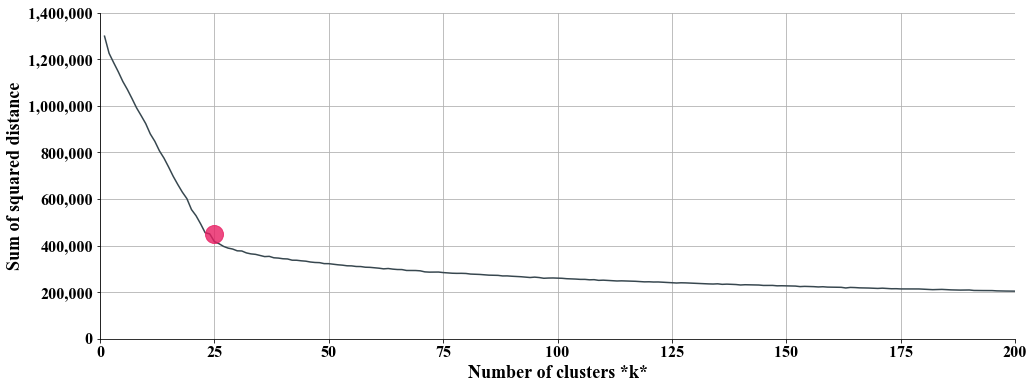

<Figure size 1152x432 with 0 Axes>

In [20]:
# Plot sse against k
#plt.figure(figsize=(16, 6))
rcParams["axes.titlesize"] = 16
rcParams["axes.labelsize"] = 'large'

fig, ax = plt.subplots()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(labelsize=16 )
ax.grid(True)

plt.plot(list_k, sse, '-', color='#37474F', markersize=6)
plt.plot(list_k[24], sse[24], '-o', color='#e91e63', markersize=18, alpha=0.8)

plt.ylim(0,1400000)
plt.xlim(0,200)
plt.xlabel(r'Number of clusters *k*', fontsize=18)
plt.ylabel('Sum of squared distance', fontsize=18);

plt.savefig("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\figures\\" + "Elbow_plot", dpi=150, format='jpg')
plt.figure(figsize=(16, 6))




***
#### Silhouette Analysis
Silhouette analysis can be used to determine the degree of separation between clusters. For each sample:
 - Compute the average distance from all data points in the same cluster (ai).
 - Compute the average distance from all data points in the closest cluster (bi).
 - Compute the coefficient:

In [ ]:
## Leave this for now
#  
#  af = AffinityPropagation(preference=-40).fit(coords_norm[0::100])
#  cluster_centers_indices = af.cluster_centers_indices_
#  labels = af.labels_
#  
#  n_clusters_ = len(cluster_centers_indices)
#  
#  print('Estimated number of clusters: %d' % n_clusters_)
#  

### Mean Shift

In [21]:
ms = MeanShift()

In [22]:
ms.fit(accidents_to_cluster_norm)

NameError: name 'accidents_to_cluster_norm' is not defined

In [136]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 159


In [ ]:
# accidents_nonan.plot.scatter(x='Location_Easting_OSGR', y='Location_Northing_OSGR',c=k_means.labels_+1, figsize=(15,15))
# sns.lmplot(x='Location_Easting_OSGR',
#             y='Location_Northing_OSGR',
#             data=accidents_nonan)

### Re- run K - means

In [25]:
k_means = KMeans(n_clusters=25)
k_means.fit(accidents_to_cluster_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
len(k_means.labels_)

40591

In [27]:
accidents_nonan["Cluster Label Number"] = k_means.labels_

In [ ]:
#### Checks

In [28]:
accidents_nonan.groupby(by="Cluster Label Number").count()["Accident_Index"]

Cluster Label Number
0     2182
1     2102
2     1584
3     4154
4     3326
5        1
6       98
7       97
8      726
9      311
10    7303
11     110
12      74
13     918
14    6210
15       5
16     614
17     592
18     339
19     201
20    2850
21     567
22     452
23    5221
24     554
Name: Accident_Index, dtype: int64

<BarContainer object of 25 artists>

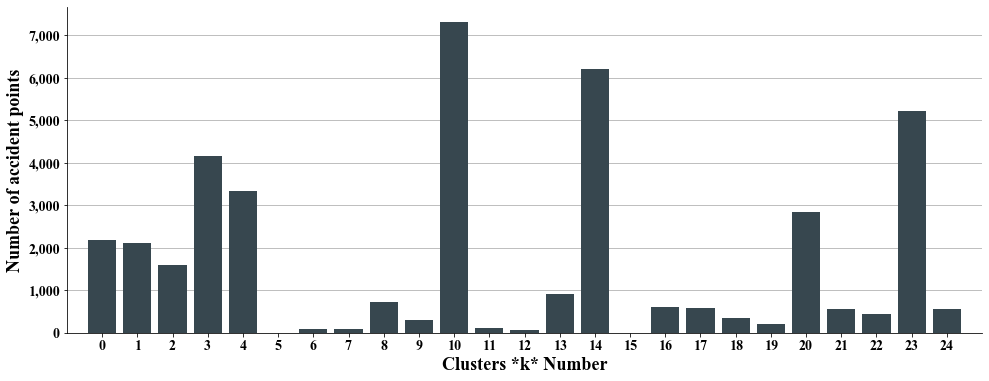

In [29]:
fig, ax = plt.subplots()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(labelsize=14)

ax.spines['left'].set_position(('data', -1))
plt.grid(which='major', axis='y', zorder=0)

#plt.ylim(0,1400000)
plt.xlim(-1,25)
plt.xlabel(r'Clusters *k* Number', fontsize=18)
plt.ylabel('Number of accident points', fontsize=18);
plt.xticks(range(0,25))

plt.bar(accidents_nonan.groupby(by="Cluster Label Number").count()["Accident_Index"].index,
   accidents_nonan.groupby(by="Cluster Label Number").count()["Accident_Index"],
       color='#37474F', zorder=3)

In [165]:
k_means.cluster_centers_[0]

array([ 2.35802281e-03, -9.70288292e-02,  1.58699593e-01, -1.06123385e-02,
       -6.57452784e-02, -2.06800921e-01, -1.58192629e-01, -4.48322397e-02,
        1.93900096e-01, -1.20652395e-01, -1.37621504e-01,  1.53502706e-01,
       -2.81695568e-01, -1.25387918e-01, -2.46072739e-01, -1.22772791e-01,
       -2.43167531e-01, -1.18713950e-01, -4.62525044e-01, -5.16836794e-02,
       -1.38248173e-01, -4.22124259e-02, -9.22040395e-02, -4.96352798e-03,
        2.98385480e+00, -1.04766144e-01, -1.58402029e-01, -4.91952374e-02,
       -1.10993329e-02, -8.80269945e-02, -4.85204953e-02, -7.05961599e-02])

In [35]:
accidents_nonan[accidents_nonan["Cluster Label Number"]==10].transpose()

,86686,86807,86880,86881,86889,86900,86989,87014,87016,87067,...,660919,660924,660926,660932,660935,660936,660937,660938,660946,660947
Unnamed: 0,86686,86807,86880,86881,86889,86900,86989,87014,87016,87067,...,131625,131630,131632,131638,131641,131642,131643,131644,131652,131653
Accident_Index,2018440007458,2018440022761,2018440032159,2018440032203,2018440032766,2018440034311,2018440048206,2018440051420,2018440051474,2018440058456,...,2014554D53179,2014554D53377,2014554D53547,2014554D53785,2014554D53915,2014554D53948,2014554D54115,2014554D54206,2014554D54389,2014554X19195
Location_Easting_OSGR,430372,424520,441551,423330,441305,431199,424405,424432,423950,434478,...,380930,407960,407780,368940,415720,346660,366370,407750,401550,402950
Location_Northing_OSGR,114449,94924,108019,95578,106143,95158,95949,94896,94783,98139,...,126290,100330,100480,90270,92920,91610,77540,100660,102180,119310
Longitude,-1.5692,-1.65377,-1.41087,-1.6706,-1.41458,-1.55907,-1.65533,-1.65502,-1.66186,-1.51231,...,-2.27337,-1.88843,-1.89098,-2.4413,-1.77862,-2.75703,-2.47654,-1.8914,-1.97938,-1.95938
Latitude,50.9287,50.7534,50.8702,50.7593,50.8533,50.7552,50.7626,50.7531,50.7521,50.7818,...,51.0356,50.8024,50.8038,50.7112,50.7356,50.7216,50.5965,50.8054,50.8191,50.9731
Police_Force,44,44,44,44,44,44,44,44,44,44,...,55,55,55,55,55,55,55,55,55,55
Accident_Severity,2,3,3,2,3,3,3,3,3,2,...,2,3,3,3,3,3,3,3,3,3
Number_of_Vehicles,2,2,2,2,1,3,1,2,1,2,...,1,2,3,2,3,3,3,2,2,4
Number_of_Casualties,2,1,1,2,1,1,1,1,1,2,...,1,2,2,1,1,1,1,2,1,1


### Try pairplot or that heat map thing from seaborn

In [65]:
colums_to_feature.append("Cluster Label Number")

accidents_pairplot = accidents_nonan[colums_to_feature[3:]]
accidents_pairplot.head()

,Day_of_Week,1st_Road_Class,Speed_limit,Junction_Detail,2nd_Road_Class,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Fatal,...,Tram,Van / Goods 3.5 tonnes mgw or under,Goods over 3.5t. and under 7.5t,Goods 7.5 tonnes mgw and over,Mobility scooter,Electric motorcycle,Other vehicle,Motorcycle - unknown cc,Goods vehicle - unknown weight,Cluster Label Number
86634,2,6,40.0,3,6,6,1,1,2,0,...,0,0,0,0,0,0,0,0,0,4
86642,3,3,40.0,3,6,6,2,2,2,0,...,0,0,0,0,0,0,0,0,0,4
86648,4,3,40.0,0,-1,6,4,2,2,0,...,0,0,0,0,0,0,0,0,0,4
86653,2,4,40.0,0,-1,7,1,1,2,0,...,0,0,0,0,0,0,0,0,0,4
86656,4,3,60.0,0,-1,6,1,2,2,0,...,0,0,0,0,0,0,0,0,0,4


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


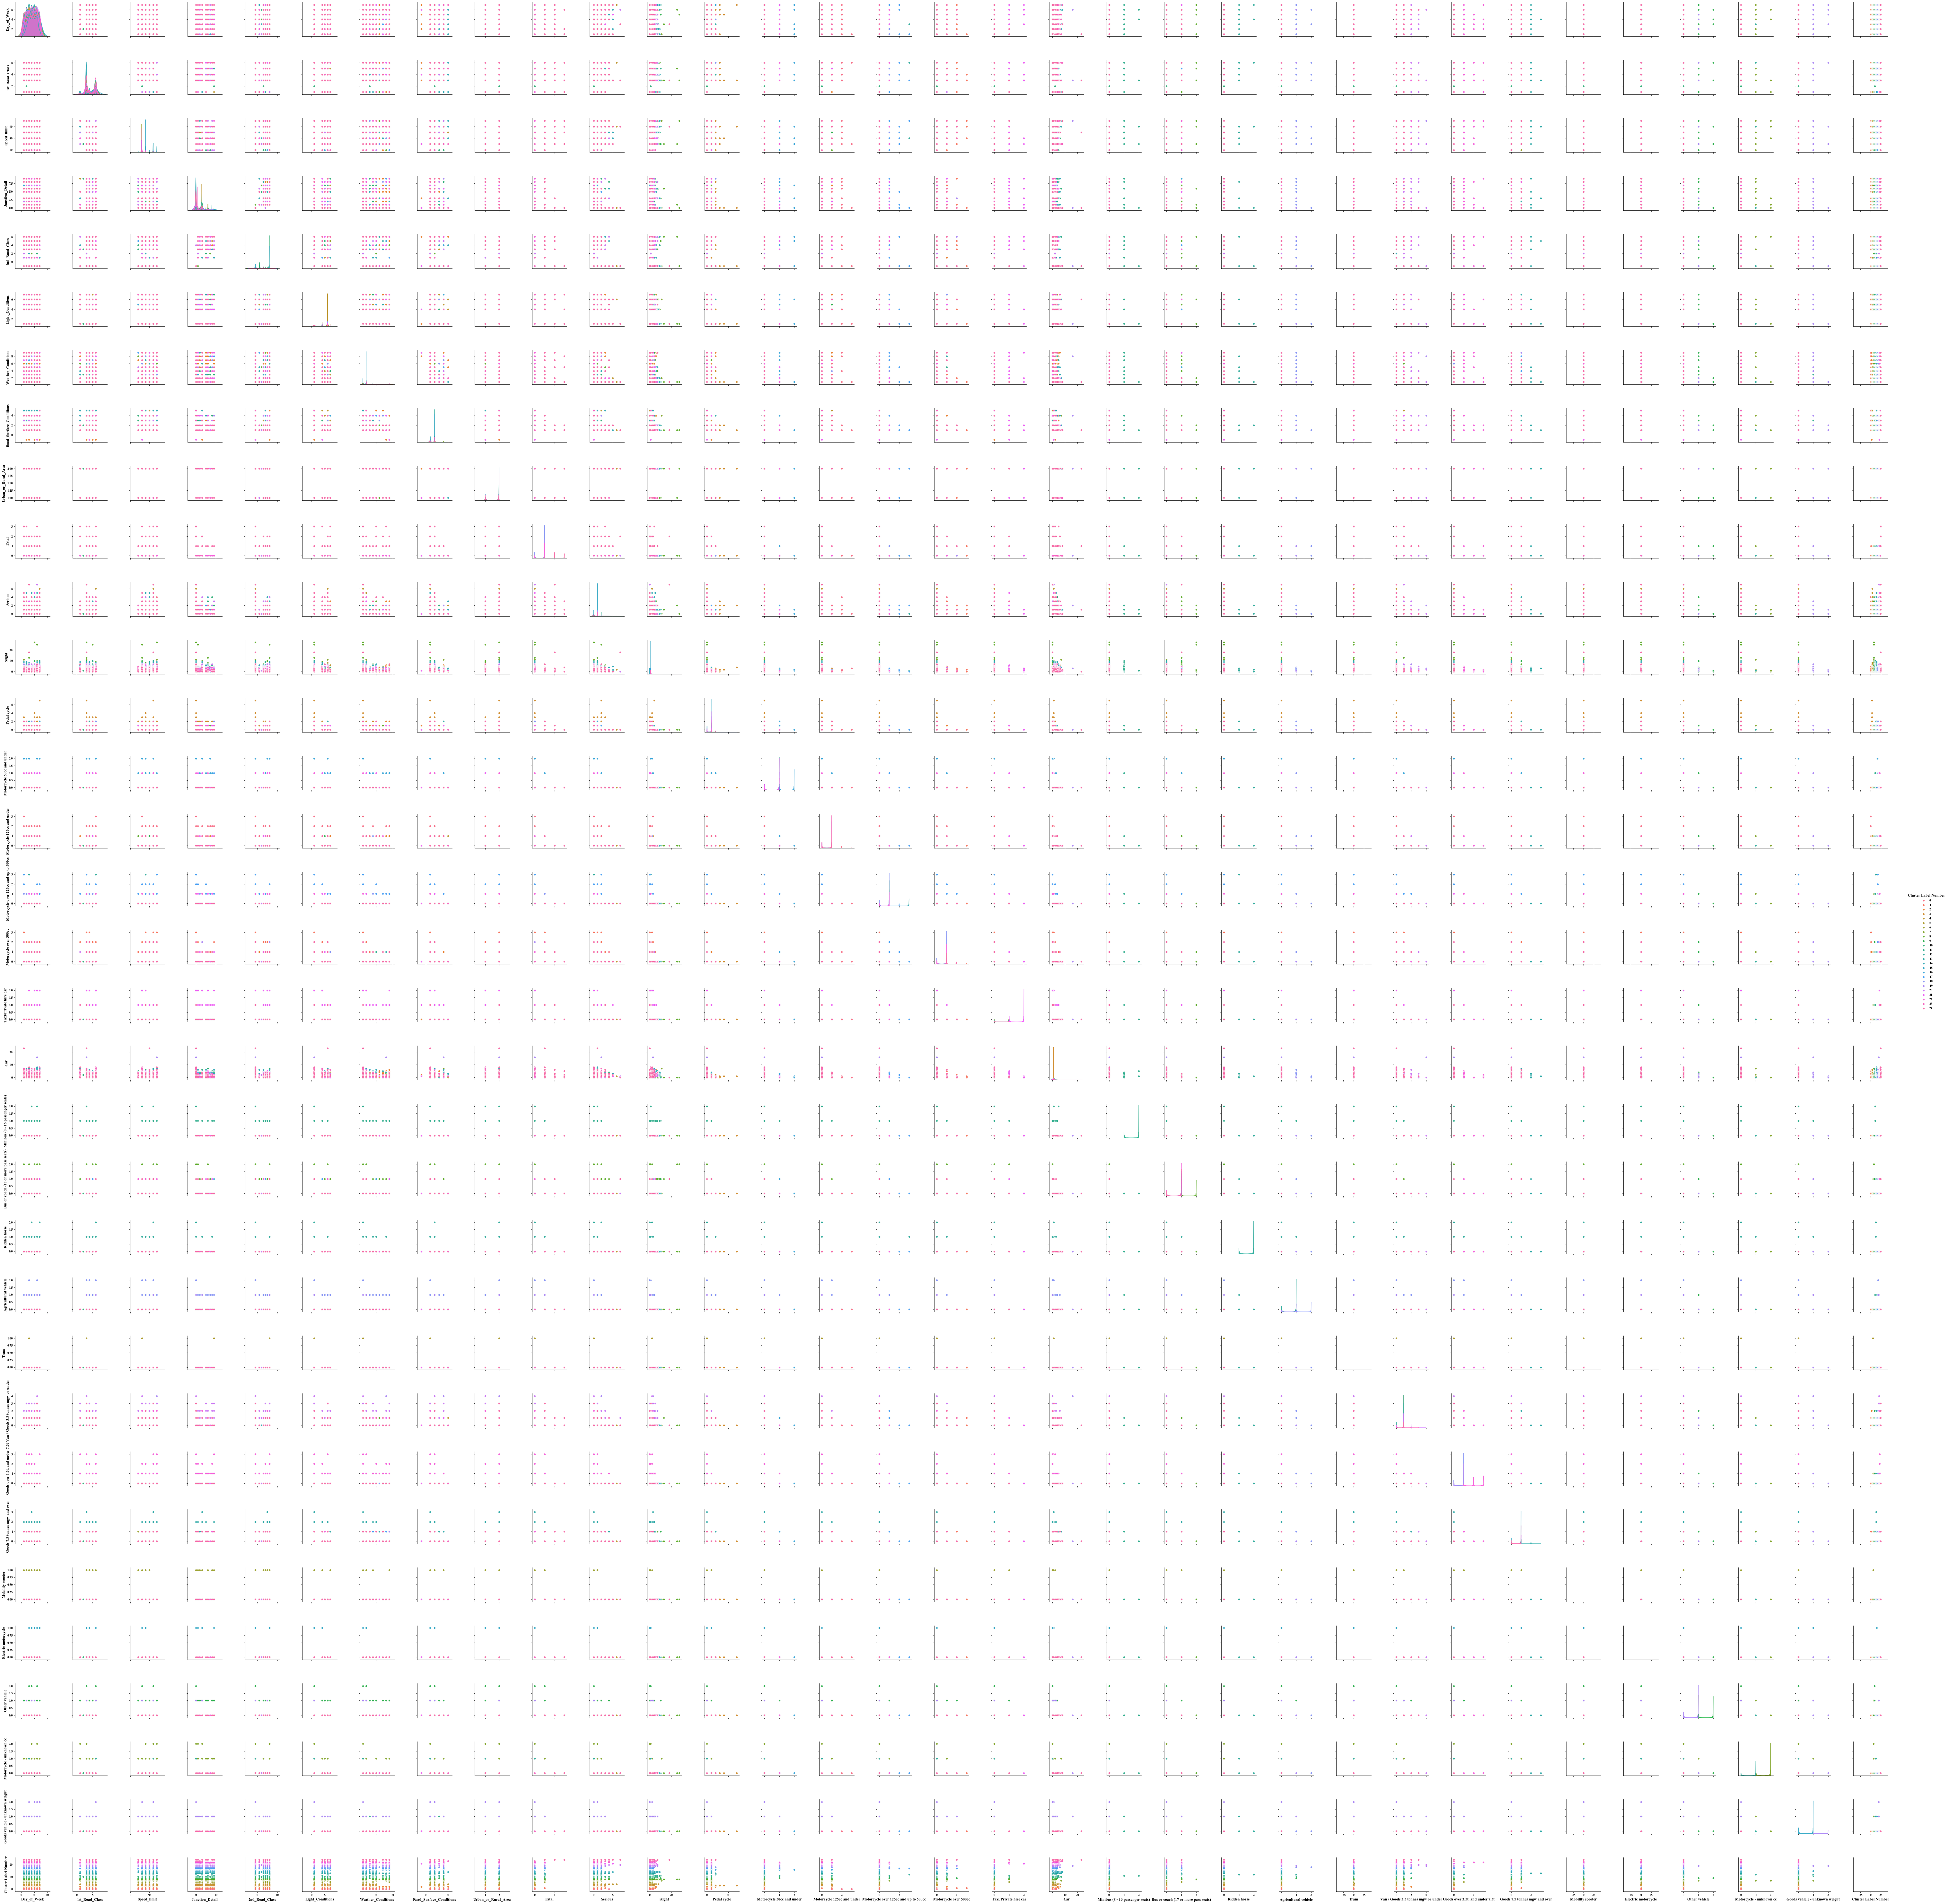

In [66]:
sns.set_palette(sns.color_palette(['#f44336','#e91e63',
                                   '#9c27b0', '#ffc107', '#2196F3', '#03A9F4', '#00BCD4', '#009688']))



sns.pairplot(accidents_pairplot, hue="Cluster Label Number")

### PCA

In [40]:
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [43]:
numSamples, numFeatures = accidents_to_cluster.data.shape
print(numSamples)
print(numFeatures)

40591
32


In [46]:
X = accidents_to_cluster.data

n_components=[]
explained_variance=[]
sum_explained_variance=[]

In [47]:
for n in range(2,32,1):
    pca = PCA(n_components=n, whiten=True).fit(X)
    explained_variance.append(pca.explained_variance_ratio_)
    sum_explained_variance.append(sum(pca.explained_variance_ratio_))

In [49]:
sum_explained_variance

[0.9398392684727667,
 0.9548055463121737,
 0.9678207631466632,
 0.9761084004432112,
 0.9830483833708351,
 0.9896149812842945,
 0.9935344575365793,
 0.9956152863095653,
 0.996800913097722,
 0.9975155535549656,
 0.9981221497931966,
 0.9985610565362507,
 0.9989558179413895,
 0.9991991537725499,
 0.9993814890890311,
 0.9994936008198119,
 0.9995691600437981,
 0.9996417956696533,
 0.999706235868698,
 0.9997673400152874,
 0.9998228747870006,
 0.9998724086507637,
 0.9999071678512877,
 0.9999385037727867,
 0.9999598304271349,
 0.9999712949974991,
 0.9999818744122063,
 0.9999915061036336,
 0.9999994031853378,
 0.9999999004434145]

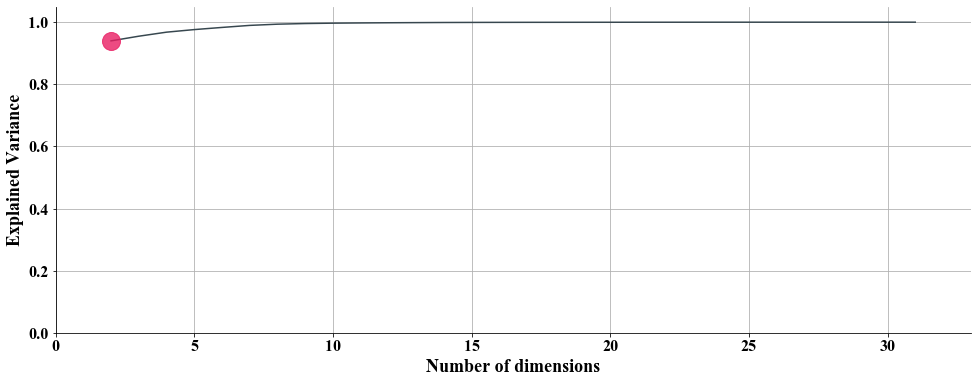

In [70]:
rcParams["axes.titlesize"] = 16
rcParams["axes.labelsize"] = 'large'

fig, ax = plt.subplots()
#ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.tick_params(labelsize=16 )
ax.grid(True)

plt.plot(range(2,32,1), sum_explained_variance, '-', color='#37474F', markersize=6)
plt.plot(2, sum_explained_variance[0], '-o', color='#e91e63', markersize=18, alpha=0.8)

plt.ylim(0,1.05)
plt.xlim(0,33)
plt.xlabel(r'Number of dimensions', fontsize=18)
plt.ylabel('Explained Variance', fontsize=18);

#plt.savefig("C:\\Projects\\0_Training\\AU_MLAI\\IndividualProject\\figures\\" + "Elbow_plot", dpi=150, format='jpg')
#plt.figure(figsize=(16, 6))

In [50]:
pca = PCA(n_components=2, whiten=True).fit(X)

In [53]:
accidents_pca = pca.transform(X)
pca.explained_variance_ratio_

array([0.88194845, 0.05789082])

In [54]:
## Eigen vectors
pca.components_

array([[-1.69804246e-03, -3.86213748e-02,  9.96359615e-01,
        -3.09753757e-02, -6.32919652e-02,  1.47516123e-02,
         5.43451696e-03,  5.21151411e-03,  2.04183621e-02,
         6.58895877e-04,  2.12117183e-03,  6.92725005e-03,
        -4.17778182e-03, -4.73183421e-04, -1.12855491e-03,
        -1.28436670e-04,  8.21533020e-04, -4.75639342e-04,
         6.35128781e-03,  1.01948915e-05, -4.91339226e-04,
         4.43907860e-05,  4.01701862e-04, -1.37552100e-06,
         1.21334520e-03,  2.91627079e-04,  1.15806073e-03,
        -1.32743546e-04, -5.65127317e-06,  8.13409646e-05,
        -3.09518399e-05,  8.64823248e-05],
       [ 8.14551127e-03, -1.50340090e-02,  6.97314843e-02,
         5.74505641e-01,  8.14249667e-01, -3.48981090e-02,
        -1.14206087e-02, -7.76306906e-03, -9.51071447e-03,
        -1.22668462e-03, -1.77741606e-03,  6.02774597e-03,
         6.26256385e-03,  7.05563427e-04,  2.40648546e-03,
         8.83359754e-04,  2.30656156e-03,  1.03945976e-04,
         1.38

In [57]:
len(accidents_pca)
accidents_pca_df = pd.DataFrame(accidents_pca, columns=["PCA X", "PCA Y"])
accidents_pca_df["K Means Label"] = k_means.labels_
accidents_pca_df.head()

,PCA X,PCA Y,K Means Label
0,-0.140170,0.924084,4
1,-0.131289,0.936751,4
2,-0.095564,-1.038326,4
3,-0.098081,-1.042659,4
4,1.253147,-0.657508,4


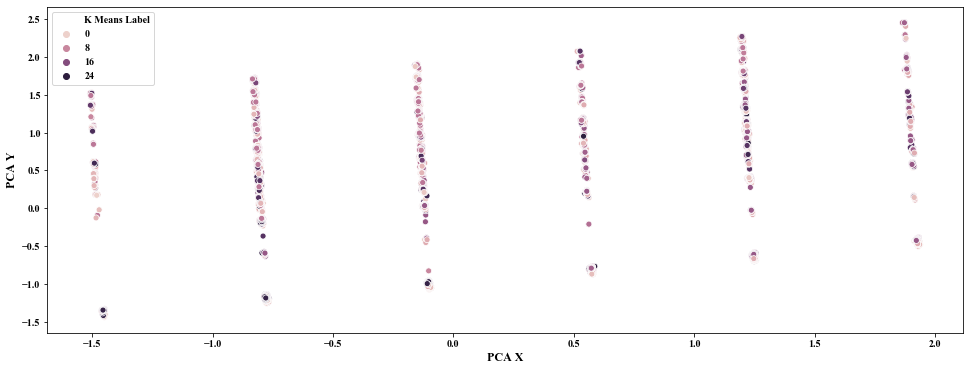

In [58]:
sns.scatterplot(x="PCA X", y="PCA Y", data=accidents_pca_df, hue="K Means Label")

### DBSCAN

In [ ]:
dbcluster = dbscan